In [1]:
!pip install pandas numpy scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data.csv')

In [4]:
def recommend_pressure(row):
    if row['posture_angle_deg'] > row['target_posture_angle_deg'] + 2:
        return 1.0  # Tighten
    elif row['posture_angle_deg'] < row['target_posture_angle_deg'] - 2:
        return -1.0 # Loosen
    else:
        return 0.0  # No change

In [5]:
df['recommended_pressure_change_mmhg'] = df.apply(recommend_pressure, axis=1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X = df[['posture_angle_deg', 'target_posture_angle_deg', 'brace_pressure_mmhg', 'target_pressure_mmhg']]
y = df['recommended_pressure_change_mmhg']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
y_pred = model.predict(X_test)

In [20]:
import numpy as np
for i in range(10):
    print(f"Features: {X_test.iloc[i].to_dict()}")
    print(f"Actual change: {y_test.iloc[i]}, Predicted: {round(y_pred[i],2)}\n")

Features: {'posture_angle_deg': 10.9, 'target_posture_angle_deg': 8.0, 'brace_pressure_mmhg': 13.3, 'target_pressure_mmhg': 12.0}
Actual change: 1.0, Predicted: 0.46

Features: {'posture_angle_deg': 4.9, 'target_posture_angle_deg': 8.0, 'brace_pressure_mmhg': 10.9, 'target_pressure_mmhg': 12.0}
Actual change: -1.0, Predicted: -0.53

Features: {'posture_angle_deg': 14.0, 'target_posture_angle_deg': 8.0, 'brace_pressure_mmhg': 13.5, 'target_pressure_mmhg': 12.0}
Actual change: 1.0, Predicted: 0.96

Features: {'posture_angle_deg': 11.3, 'target_posture_angle_deg': 8.0, 'brace_pressure_mmhg': 14.2, 'target_pressure_mmhg': 12.0}
Actual change: 1.0, Predicted: 0.54

Features: {'posture_angle_deg': 13.6, 'target_posture_angle_deg': 8.0, 'brace_pressure_mmhg': 13.3, 'target_pressure_mmhg': 12.0}
Actual change: 1.0, Predicted: 0.9

Features: {'posture_angle_deg': 15.8, 'target_posture_angle_deg': 8.0, 'brace_pressure_mmhg': 13.9, 'target_pressure_mmhg': 12.0}
Actual change: 1.0, Predicted: 1.26

In [21]:
df['ml_predicted_change_mmhg'] = model.predict(X)
df.to_csv('smart_tlsobrace_with_ml_predictions.csv', index=False)
print("Saved predictions with ML output.")

Saved predictions with ML output.


In [22]:
import matplotlib.pyplot as plt

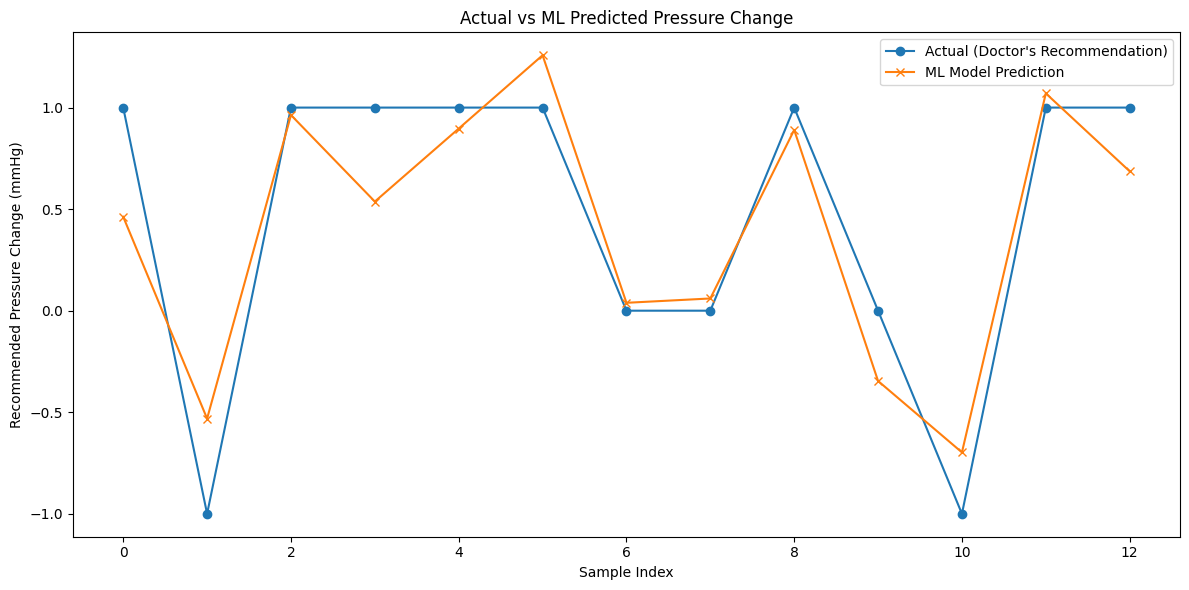

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual (Doctor's Recommendation)", marker='o')
plt.plot(y_pred, label="ML Model Prediction", marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Recommended Pressure Change (mmHg)')
plt.title('Actual vs ML Predicted Pressure Change')
plt.legend()
plt.tight_layout()
plt.show()